# Ejercicio 1 – EDA (Exploratory Data Analysis) Python

## 1.-Carga todos los csv en un único dataframe ¿Cuántas filas totales obtienes?

In [71]:
#Se importa el módulo OS para manejar rutas y archivos del sistema.
import os
import pandas as pd
import numpy as np

# Ruta base donde están los archivos
ruta = '/content/sample_data'


In [72]:
# Lista de años que representan los nombres de los archivos
for year in range(2019, 2025):  # De 2019 a 2024
    archivo = f"{year}_Accidentalidad.csv"
    ruta_completa = os.path.join(ruta, archivo)

In [73]:
# Lista para almacenar los DataFrames cargados
dataframes = []

In [74]:
# Cargar todos los archivos CSV que coincidan con el patrón
for year in range(2019, 2025):  # De 2019 a 2024
    archivo = f"{year}_Accidentalidad.csv"
    ruta_completa = os.path.join(ruta, archivo)

    # Leer el CSV y añadirlo a la lista
    df = pd.read_csv(ruta_completa, sep=";", encoding="utf-8")
    dataframes.append(df)

In [75]:
# Concatenar todos los DataFrames en uno solo
df_unico = pd.concat(dataframes, ignore_index=True)

In [76]:
# Obtener el número de filas y columnas
filas, columnas = df_unico.shape
# Mostrar los resultados
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

El DataFrame tiene 262075 filas y 19 columnas.


In [77]:
# Mostrar un resumen del DataFrame resultante
df_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262075 entries, 0 to 262074
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        262075 non-null  object 
 1   fecha                 262075 non-null  object 
 2   hora                  262075 non-null  object 
 3   localizacion          262075 non-null  object 
 4   numero                262067 non-null  object 
 5   cod_distrito          262067 non-null  float64
 6   distrito              262067 non-null  object 
 7   tipo_accidente        262068 non-null  object 
 8   estado_meteorológico  233670 non-null  object 
 9   tipo_vehiculo         260810 non-null  object 
 10  tipo_persona          262072 non-null  object 
 11  rango_edad            262075 non-null  object 
 12  sexo                  262075 non-null  object 
 13  cod_lesividad         143678 non-null  float64
 14  lesividad             143678 non-null  object 
 15  

## 2.-No vamos a emplear variables que estén referidas a coordenadas, borra todas aquellas columnas que estén referidas a coordenadas.

In [78]:
# Eliminar columnas relacionadas con coordenadas
df_unico = df_unico.drop(columns=['coordenada_x_utm', 'coordenada_y_utm'], errors='ignore')
print(df_unico.columns)


Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'positiva_alcohol', 'positiva_droga'],
      dtype='object')


## 3.- Si observamos la columna que contiene el tipo del vehículo, encontramos mucha información redundante, vamos a reestructurar esta columna para tener solamente las siguientes categorías:

1. Turismo
2. Motocicleta
3. Furgoneta
4. Bicicleta
5. Camión
6. Autobús
7. Otro vehículo.

En este sentido siéntete libre de realizar tu propia reestructuración, este, sería un ejemplo:

Crear la categoría
Motocicleta que contenga:
* Motocicleta hasta 125 cc
* Motocicleta > 125cc
* Ciclomotor
* Moto de tres ruedas > 125cc
* Ciclomotor de dos ruedas L1e-B
* Moto de tres ruedas hasta 125cc
* Ciclo de motor L1e-A

Bicicleta que contenga:
* Bicicleta
* Bicicleta EPAC (pedaleo asistido)
* Ciclo

Autobús que contenga:
* Autobús
* Autobús articulado
* Autobús EMT
* Autobús articulado EMT
* Microbús <= 17 plazas

Camión que contenga:
* Camión rígido
* Tractocamión

Finalmente, muestra el nº de categorías nuevas junto con su frecuencia y porcentaje de las mismas

NOTA: Los valores nulos de esta columna los transformaremos también en la categoría Otro vehículo.

In [79]:
# Mostrar valores únicos de la columna tipo_vehiculo
valores_unicos = df_unico["tipo_vehiculo"].unique()
print(valores_unicos)

['Motocicleta > 125cc' 'Turismo' 'Furgoneta' 'Autobús' 'Ciclomotor'
 'Motocicleta hasta 125cc' 'Todo terreno' 'Bicicleta' 'Camión rígido'
 'Maquinaria de obras' 'Tractocamión' nan 'Cuadriciclo no ligero'
 'Vehículo articulado' 'Autobús articulado' 'Otros vehículos con motor'
 'Autocaravana' 'Patinete' 'Ciclo' 'Cuadriciclo ligero' 'VMU eléctrico'
 'Semiremolque' 'Microbús <= 17 plazas' 'Sin especificar' 'Autobus EMT'
 'Remolque' 'Tranvía' 'Caravana' 'Camión de bomberos'
 'Otros vehículos sin motor' 'Bicicleta EPAC (pedaleo asistido)'
 'Moto de tres ruedas > 125cc' 'Tren/metro' 'Ambulancia SAMUR'
 'Moto de tres ruedas hasta 125cc' 'Ciclomotor de dos ruedas L1e-B'
 'Maquinaria agrícola' 'Autobús articulado EMT'
 'Ciclomotor de tres ruedas' 'Ciclo de motor L1e-A'
 'Patinete no eléctrico']


In [80]:
# Reestructuración de la columna tipo_vehiculo
def categoria_vehiculo(tipo):
    if pd.isnull(tipo):
        return "Otro vehículo"
    tipo = tipo.strip().lower()  # Convertir a minúsculas para evitar problemas con mayúsculas/minúsculas incluyendo los espacios

    if any(x in tipo for x in [
        "motocicleta hasta 125", "motocicleta > 125", "ciclomotor",
        "cuadriciclo no ligero", "moto de tres ruedas > 125cc", " Moto de tres ruedas hasta 125cc ",
        "ciclomotor de dos ruedas l1e-b", "ciclomotor de tres ruedas", "Ciclo de motor L1e-A"
    ]):
        return "Motocicleta"
    elif any(x in tipo for x in ["bicicleta", "Bicicleta EPAC (pedaleo asistido)", "ciclo"]):
        return "Bicicleta"
    elif any(x in tipo for x in [
        "autobús", "autobús articulado", "Microbús <= 17 plazas" "Autobus EMT", "Autobús articulado EMT"
    ]):
        return "Autobús"
    elif any(x in tipo for x in ["camión rígido", "tractocamión", "Camión de bomberos"]):
        return "Camión"
    elif "turismo" in tipo:
        return "Turismo"
    elif any(x in tipo for x in ["Furgoneta", "Todo terreno", "Caravana", "Ambulancia SAMUR"]):
        return "Furgoneta"
    else:
        return "Otro vehículo"



In [81]:
# Aplicar la reestructuración de la columna tipo_vehiculo
df_unico["tipo_vehiculo"] = df_unico["tipo_vehiculo"].apply(categoria_vehiculo)

# Calculo de la frecuencia y porcentaje
frecuencia = df_unico["tipo_vehiculo"].value_counts()
porcentaje = df_unico["tipo_vehiculo"].value_counts(normalize=True) * 100

# Combinar frecuencia y porcentaje en un DataFrame
resumen = pd.DataFrame({
    "Frecuencia": frecuencia,
    "Porcentaje": porcentaje.round(2)
})

# Mostrar el resumen
print(resumen)


               Frecuencia  Porcentaje
tipo_vehiculo                        
Turismo            181015       69.07
Motocicleta         32610       12.44
Otro vehículo       28176       10.75
Autobús              7441        2.84
Camión               7201        2.75
Bicicleta            5632        2.15


## 4.- Vamos a analizar valores nulos, inspecciona los valores nulos de todas las columnas.



In [82]:
# Se calcula la cantidad de valores nulos por columna
valores_nulos = df_unico.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (valores_nulos / len(df_unico)) * 100

# Crear un DataFrame con los resultados
nulos_df = pd.DataFrame({
    "Cantidad de nulos": valores_nulos,
    }).reset_index()
nulos_df.rename(columns={"index": "Columna"}, inplace=True)

# Mostrar el resultado
print(nulos_df)


                 Columna  Cantidad de nulos
0         num_expediente                  0
1                  fecha                  0
2                   hora                  0
3           localizacion                  0
4                 numero                  8
5           cod_distrito                  8
6               distrito                  8
7         tipo_accidente                  7
8   estado_meteorológico              28405
9          tipo_vehiculo                  0
10          tipo_persona                  3
11            rango_edad                  0
12                  sexo                  0
13         cod_lesividad             118397
14             lesividad             118397
15      positiva_alcohol                920
16        positiva_droga             261217


* Revisa si hay columnas que son íntegramente valores nulos, si esto ocurre, borra esas columnas

In [83]:
# Identificar columnas que son íntegramente valores nulos
columnas_nulas_completas = df_unico.columns[df_unico.isnull().all()]

# Mostrar columnas con valores completamente nulos
print("Columnas totalmente nulas:", columnas_nulas_completas)

Columnas totalmente nulas: Index([], dtype='object')


* Para la columna positivo droga, rellena los nulos con 0.

In [84]:
columna = "positiva_droga"

valores_unicos = df_unico["positiva_droga"].unique()
print(valores_unicos)

nulos = df_unico[columna].isnull().sum()
print(f"Valores nulos en la columna '{columna}': {nulos}")

[nan  1.]
Valores nulos en la columna 'positiva_droga': 261217


In [85]:
# Rellenar valores nulos de la columna 'positiva_droga' con 0
df_unico["positiva_droga"] = df_unico["positiva_droga"].fillna(0)

# Verificar que ya no hay valores nulos en la columna
print(df_unico["positiva_droga"].isnull().sum())

0


* Para la columna positivo alcohol, rellena los nulos con “N”

In [86]:
columna = "positiva_alcohol"

valores_unicos = df_unico["positiva_alcohol"].unique()
print(valores_unicos)

['N' 'S' nan]


In [87]:
df_unico["positiva_alcohol"] = df_unico["positiva_alcohol"].fillna("N")

print(df_unico["positiva_alcohol"].isnull().sum())

0


* Para las columnas referidas a lesividad, rellenaremos los datos faltantes con “Sin atención sanitaria” (en código lesividad, pondremos valor 0)

In [88]:
columna = "cod_lesividad"

valores_unicos = df_unico["cod_lesividad"].unique()
print(valores_unicos)

[ 7. nan  2. 14.  5.  3.  1.  6.  4. 77.]


In [89]:
df_unico["cod_lesividad"] = df_unico["cod_lesividad"].fillna(0)

print(df_unico["cod_lesividad"].isnull().sum())

0


In [90]:
columna = "lesividad"

valores_unicos = df_unico["lesividad"].unique()
print(valores_unicos)

['Asistencia sanitaria sólo en el lugar del accidente' nan
 'Ingreso inferior o igual a 24 horas' 'Sin asistencia sanitaria'
 'Asistencia sanitaria ambulatoria con posterioridad'
 'Ingreso superior a 24 horas'
 'Atención en urgencias sin posterior ingreso'
 'Asistencia sanitaria inmediata en centro de salud o mutua'
 'Fallecido 24 horas' 'Se desconoce']


In [91]:
df_unico["lesividad"] = df_unico["lesividad"].fillna("Sin asistencia sanitaria")

print(df_unico["lesividad"].isnull().sum())

0


* Para el estado meteorológico emplearemos la categoría ya existente “Se desconoce”

In [92]:
columna = "estado_meteorológico"

valores_unicos = df_unico["estado_meteorológico"].unique()
print(valores_unicos)

['Despejado' nan 'Se desconoce' 'Lluvia débil' 'Nublado' 'LLuvia intensa'
 'Granizando' 'Nevando']


In [93]:
df_unico["estado_meteorológico"] = df_unico["estado_meteorológico"].fillna("Se desconoce")

print(df_unico["estado_meteorológico"].isnull().sum())

0


* El resto de valores nulos, los eliminaremos del conjunto de datos.

In [94]:
# Eliminar todas las filas que contienen valores nulos
df_unico = df_unico.dropna()

# Verificar que no queden valores nulos en el DataFrame
print(df_unico.isnull().sum().sum())  # Debería mostrar 0 si no hay nulos


0



* ¿Cuántas filas y columnas tienes ahora?

In [95]:
# Obtener el número de filas y columnas
filas, columnas = df_unico.shape

# Mostrar los resultados
print(f"El DataFrame tiene ahora {filas} filas y {columnas} columnas.")

df_unico.info()


El DataFrame tiene ahora 262057 filas y 17 columnas.
<class 'pandas.core.frame.DataFrame'>
Index: 262057 entries, 0 to 262074
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        262057 non-null  object 
 1   fecha                 262057 non-null  object 
 2   hora                  262057 non-null  object 
 3   localizacion          262057 non-null  object 
 4   numero                262057 non-null  object 
 5   cod_distrito          262057 non-null  float64
 6   distrito              262057 non-null  object 
 7   tipo_accidente        262057 non-null  object 
 8   estado_meteorológico  262057 non-null  object 
 9   tipo_vehiculo         262057 non-null  object 
 10  tipo_persona          262057 non-null  object 
 11  rango_edad            262057 non-null  object 
 12  sexo                  262057 non-null  object 
 13  cod_lesividad         262057 non-null  float64
 14  lesi

## 5.- Vamos a seguir reduciendo el número de categorías de las columnas categóricas, en este caso, vamos a generar una nueva categoría llamada “Otro accidente” para todas aquellas categorías que tengan un porcentaje inferior al 10% en la columna tipo accidente.

In [96]:
# Calcular el porcentaje de cada categoría
porcentaje_accidentes = df_unico['tipo_accidente'].value_counts(normalize=True) * 100
porcentaje_accidentes

,proportion
tipo_accidente,
Colisión fronto-lateral,25.291444
Alcance,23.510534
Colisión lateral,14.723133
Choque contra obstáculo fijo,12.059208
Colisión múltiple,6.686332
Atropello a persona,6.592459
Caída,5.925047
Colisión frontal,2.431914
Otro,1.782055


In [97]:
# Categorías con porcentaje menor al 10%
accidentes_reemplazar = porcentaje_accidentes[porcentaje_accidentes < 10].index
print(accidentes_reemplazar)

Index(['Colisión múltiple', 'Atropello a persona', 'Caída', 'Colisión frontal',
       'Otro', 'Solo salida de la vía', 'Vuelco', 'Atropello a animal',
       'Despeñamiento'],
      dtype='object', name='tipo_accidente')


In [98]:
# Reemplazar estas categorías por "Otro accidente"
df_unico['tipo_accidente'] = df_unico['tipo_accidente'].replace(accidentes_reemplazar, 'Otro accidente')

# Verificar los resultados
print(df_unico['tipo_accidente'].value_counts(normalize=True) * 100)


tipo_accidente
Colisión fronto-lateral         25.291444
Otro accidente                  24.415681
Alcance                         23.510534
Colisión lateral                14.723133
Choque contra obstáculo fijo    12.059208
Name: proportion, dtype: float64


## 6.- Dentro de la gravedad de un accidente de tráfico como estamos comprobando hay conductores que dieron positivo por alcohol y, otros positivos por consumo de droga, pero ¿Hay algún accidente en donde los implicados dieran positivo en la prueba de alcohol y también en la prueba de drogas? Muestra el número de implicados, así como el número de expedientes diferentes.

In [99]:
# Convertir los valores 'N' y 'S' a 0 y 1 respectivamente
df_unico["positiva_alcohol"] = df_unico["positiva_alcohol"].map({'N': 0, 'S': 1})

# Contar conductores que dieron positivo por alcohol
positivos_alcohol = df_unico[df_unico["positiva_alcohol"] == 1].shape[0]

In [100]:
print(f"Número de conductores que dieron positivo por alcohol: {positivos_alcohol}")

Número de conductores que dieron positivo por alcohol: 7608


In [101]:
# Contar conductores que dieron positivo por alcohol
positivos_droga = df_unico[df_unico["positiva_droga"] == 1].shape[0]

In [102]:
print(f"Número de conductores que dieron positivo por drogas: {positivos_droga}")

Número de conductores que dieron positivo por drogas: 858


In [103]:
# Filtro para encontrar casos positivos en ambas pruebas
positivos_ambos = df_unico[(df_unico["positiva_alcohol"] == 1) & (df_unico["positiva_droga"] == 1)]

# Número total de implicados
numero_implicados = positivos_ambos.shape[0]

# Número de expedientes únicos
numero_expedientes = positivos_ambos["num_expediente"].nunique()

# Mostrar resultados
print(f"Número de implicados que dieron positivo en ambas pruebas: {numero_implicados}")
print(f"Número de expedientes diferentes con positivos en ambas pruebas: {numero_expedientes}")



Número de implicados que dieron positivo en ambas pruebas: 185
Número de expedientes diferentes con positivos en ambas pruebas: 181


*Hubo 185 personas implicadas que dieron positivo tanto en la prueba de alcohol como en la prueba de drogas. Esto significa que 181 accidentes distintos incluyen al menos un implicado que dio positivo en ambas pruebas, pero hay 4 accidentes donde más de una persona dio positivo.*

## 7.- ¿Cuál es el tipo de accidente más común para aquellos implicados que habían dado positivo en alcohol? ¿y para aquellos implicados que no dieron positivo en la prueba de alcohol? ¿Qué diferencias observas?

In [104]:
# Filtro para hallar los implicados que dieron positivo en alcohol
positivos_alcohol = df_unico[df_unico["positiva_alcohol"] == 1]

#Frecuencia de cada tipo de accidente
accidente_frecuente = positivos_alcohol["tipo_accidente"].value_counts().idxmax()
frecuencia = positivos_alcohol["tipo_accidente"].value_counts().max()

# Mostrar el resultado
print(f"El accidente más común entre los implicados positivos en alcohol es: '{accidente_frecuente}' con {frecuencia} casos.")



El accidente más común entre los implicados positivos en alcohol es: 'Choque contra obstáculo fijo' con 2971 casos.


*De este resultado indica que el alcohol afecta negativamente la capacidad de reacción, la motricidad y el juicio, lo que incrementa la probabilidad de perder el control del vehículo, por lo tanto se deduce que los conductores no pudieron maniobrar adecuadamente para evitar la colisión ya sea contra postes, barreras, árboles. Además esto podría estar relacionado a condiciones de baja visibilidad o falta de atención a la señalética vial.*

In [105]:
# Filtro para hallar los implicados que dieron negativo en alcohol
sin_alcohol = df_unico[df_unico["positiva_alcohol"] == 0]

#Frecuencia de cada tipo de accidente
accidente_frecuente = sin_alcohol["tipo_accidente"].value_counts().idxmax()
frecuencia = sin_alcohol["tipo_accidente"].value_counts().max()

# Mostrar el resultado
print(f"El accidente más común entre los implicados sin alcohol es: '{accidente_frecuente}' con {frecuencia} casos.")


El accidente más común entre los implicados sin alcohol es: 'Colisión fronto-lateral' con 65236 casos.


*De este resultado se infiere que este tipo de accidente, que generalmente involucra dos vehículos, que es típico en personas que no están bajo los efectos del alcohol y se asocia más a distracciones propias del conductor, por ejemplo errores de cálculo, distracciones por uso de los móviles mientras se conduce, no estar atento a las señales en los cruces, etc.*





**DIFERENCIAS ENTRE AMBOS ACCIDENTES**

*Los accidentes sin influencia de alcohol son mucho más frecuentes, como lo muestra la gran diferencia en números (65236 frente a 2971). Esto es porque, dado que la mayoría de los conductores no están bajo la influencia del alcohol, además tienden a ser más variados.*

*Los accidentes con infliuencia del alcohol tienden a ser más solitarios y reflejan la falta de control en volante por la baja capacidad de reaccionar ante cambios repentinos o el exceso de velocidad.*

## 8.- Para cada tipo de vehículo muestra visualmente el número de accidentes en función del estado meteorológico.

NOTA: En este apartado tomaremos cada fila como un accidente, es decir, no tienes porqué agrupar por número de expediente.

In [106]:
#Importamos librería matplotlib y Seaborn para realizar visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

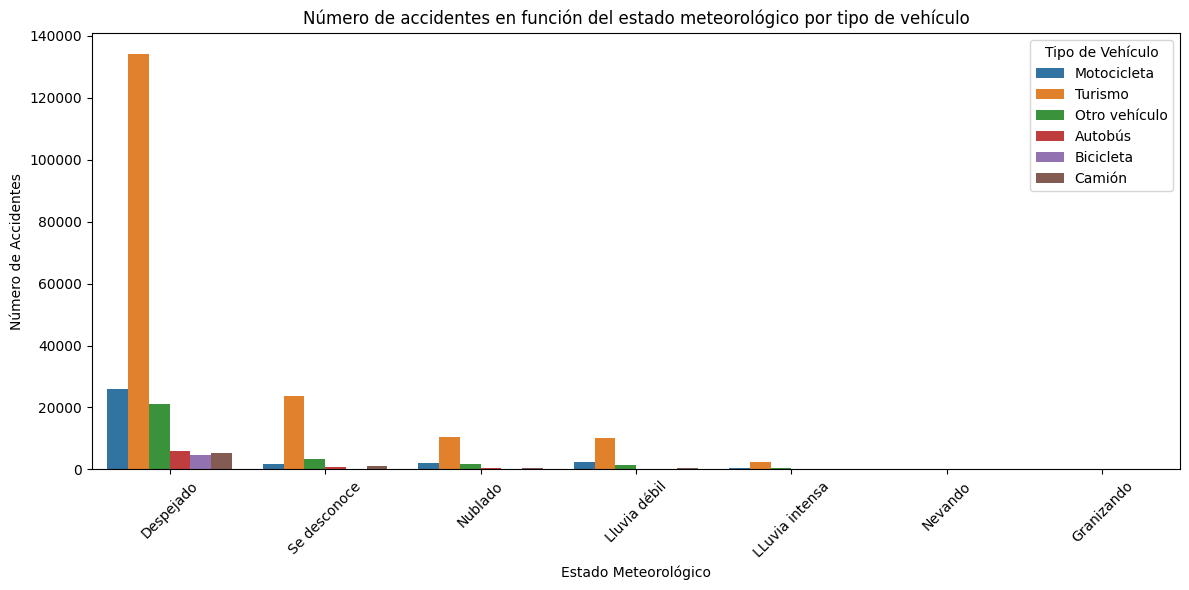

In [107]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crearemos un gráfico de barras agrupado
sns.countplot(
    data=df_unico,
    x="estado_meteorológico",
    hue="tipo_vehiculo",
    order=df_unico["estado_meteorológico"].value_counts().index  # Ordenar por frecuencia
)

# Configuración del gráfico
plt.title("Número de accidentes en función del estado meteorológico por tipo de vehículo")
plt.xlabel("Estado Meteorológico")
plt.ylabel("Número de Accidentes")
plt.legend(title="Tipo de Vehículo", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

*La gráfica muestra que la condición "Despejado" Es el más común para todos los tipos de vehículos, especialmente para los turismos, lo que podría deberse a que hay más tráfico en días despejados*

*Tambien muestra que "Se desconoce" tiene una gran cantidad de registros en que no se registró la condición metereológica al momento del accidente.*

*Las restantes tienen un menor numero ya que puede deberse a que existe menor tráfico vehícular o una conducción más precavida en esas condiciones.*

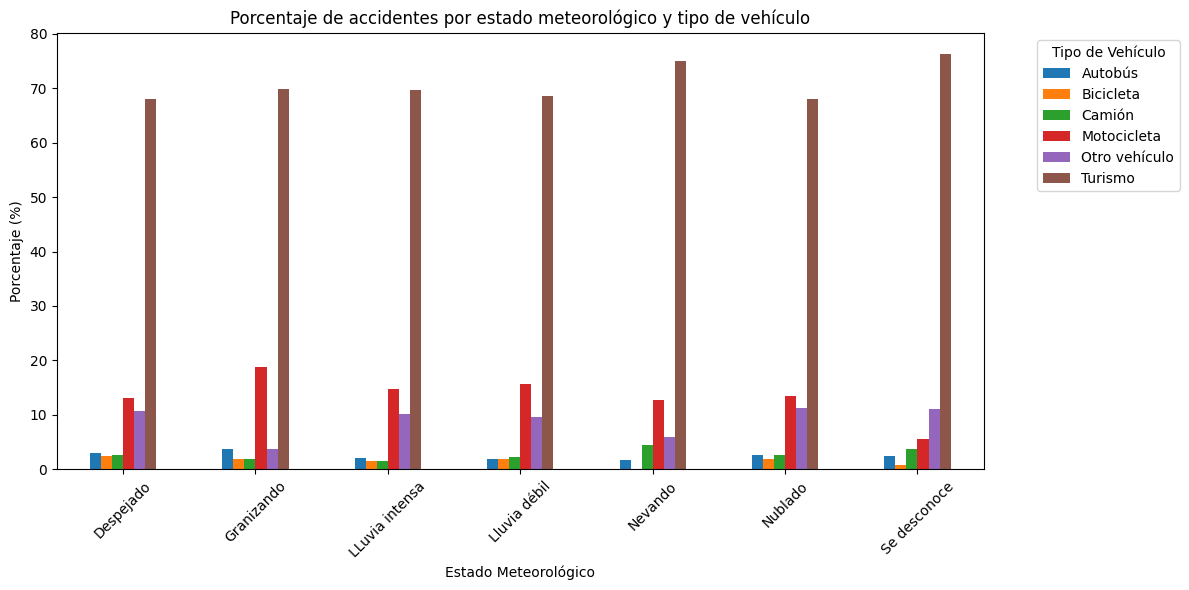

In [108]:
# Crear una tabla de frecuencias cruzadas (contingencia)
tabla_frecuencias = pd.crosstab(df_unico["estado_meteorológico"], df_unico["tipo_vehiculo"])

# Calcular el porcentaje por categoría (normalización por filas)
tabla_porcentajes = tabla_frecuencias.div(tabla_frecuencias.sum(axis=1), axis=0) * 100

tabla_porcentajes.plot(kind="bar", figsize=(12, 6))

# Configuración del gráfico
plt.title("Porcentaje de accidentes por estado meteorológico y tipo de vehículo")
plt.xlabel("Estado Meteorológico")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Tipo de Vehículo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 9.- Agrupa el dataframe por el número de expediente. Vamos a analizar si hay accidentes múltiples. De la agrupación anterior obtén todos aquellos números de expediente que tengan involucrados mayor o igual que 5 tipos distintos de vehículos

In [109]:
# Agrupar por num_expediente y contar tipos únicos de vehículos
agrupacion = df_unico.groupby("num_expediente")["tipo_vehiculo"].nunique()

# Filtrar expedientes con 5 o más tipos únicos de vehículos
accidentes_multiples = agrupacion[agrupacion >= 5]

# Mostrar resultados
print(f"Número de expedientes con 5 o más tipos distintos de vehículos: {len(accidentes_multiples)}")
print("Lista de expedientes:")
print(accidentes_multiples)


Número de expedientes con 5 o más tipos distintos de vehículos: 0
Lista de expedientes:
Series([], Name: tipo_vehiculo, dtype: int64)


*El análisis muestra que no hay expedientes con 5 o más vehiculos distintos

a. ¿Cuántos números de expediente aparecen?

In [111]:
# 1. Número de expedientes únicos
num_expedientes_unicos = df_unico['num_expediente'].nunique()
print(f"Número de expedientes únicos: {num_expedientes_unicos}")

Número de expedientes únicos: 111869


*Esto indica que se registraron 111,869 accidentes diferentes en el conjunto de datos. Cada accidente está identificado por un número de expediente único, y puede involucrar uno o varios implicados.*

b. ¿Qué cantidad de implicados hay en cada expediente?

In [112]:
# 2. Cantidad de implicados en cada expediente
implicados_por_expediente = df_unico.groupby('num_expediente').size()
print("\nCantidad de implicados por expediente:")
print(implicados_por_expediente)


Cantidad de implicados por expediente:
num_expediente
2018S017842    2
2019S000001    6
2019S000002    4
2019S000003    4
2019S000004    1
              ..
2024S030322    2
2024S030329    3
2024S030331    2
2024S030621    2
2024S031786    4
Length: 111869, dtype: int64


In [113]:
distribucion_implicados = implicados_por_expediente.value_counts().sort_index()
print("Distribución de expedientes por número de implicados:")
print(distribucion_implicados)

Distribución de expedientes por número de implicados:
1     17879
2     61123
3     19829
4      7473
5      3137
6      1327
7       562
8       286
9       124
10       53
11       32
12       14
13        8
14        7
15        4
16        1
17        1
18        1
19        1
20        2
21        1
22        1
23        1
36        1
44        1
Name: count, dtype: int64


In [114]:
max_implicados = implicados_por_expediente[implicados_por_expediente == implicados_por_expediente.max()]
print("\nExpedientes con el mayor número de implicados:")
print(max_implicados)



Expedientes con el mayor número de implicados:
num_expediente
2023S039284    44
dtype: int64


In [115]:
# Filtrar los registros del expediente con el mayor número de implicados
expediente_detalle = df_unico[df_unico['num_expediente'] == '2023S039284']

# Mostrar el detalle completo del expediente
print("Detalle completo del expediente 2023S039284:")

expediente_detalle.head(5)


Detalle completo del expediente 2023S039284:


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,positiva_alcohol,positiva_droga
220764,2023S039284,20/12/2023,17:50:00,"AUTOV. M-30, 11NL51",11NL51,2.0,ARGANZUELA,Alcance,Despejado,Autobús,Conductor,De 40 a 44 años,Hombre,14.0,Sin asistencia sanitaria,0,0.0
220765,2023S039284,20/12/2023,17:50:00,"AUTOV. M-30, 11NL51",11NL51,2.0,ARGANZUELA,Alcance,Despejado,Autobús,Pasajero,De 18 a 20 años,Hombre,14.0,Sin asistencia sanitaria,0,0.0
220766,2023S039284,20/12/2023,17:50:00,"AUTOV. M-30, 11NL51",11NL51,2.0,ARGANZUELA,Alcance,Despejado,Autobús,Pasajero,De 18 a 20 años,Mujer,14.0,Sin asistencia sanitaria,0,0.0
220767,2023S039284,20/12/2023,17:50:00,"AUTOV. M-30, 11NL51",11NL51,2.0,ARGANZUELA,Alcance,Despejado,Autobús,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,0,0.0
220768,2023S039284,20/12/2023,17:50:00,"AUTOV. M-30, 11NL51",11NL51,2.0,ARGANZUELA,Alcance,Despejado,Autobús,Pasajero,De 21 a 24 años,Mujer,14.0,Sin asistencia sanitaria,0,0.0


In [116]:
# Filtrar registros del expediente con el mayor número de implicados
expediente_detalle = df_unico[df_unico['num_expediente'] == '2023S039284']

# Verificar la necesidad de asistencia sanitaria
asistencia_sanitaria = expediente_detalle['lesividad'].value_counts()

# Mostrar el detalle de asistencia sanitaria
print("Distribución de asistencia sanitaria en el expediente 2023S039284:")
print(asistencia_sanitaria)


Distribución de asistencia sanitaria en el expediente 2023S039284:
lesividad
Sin asistencia sanitaria                              43
Asistencia sanitaria ambulatoria con posterioridad     1
Name: count, dtype: int64


*Este expediente se refiere a un accidente por alcance del año 2023 ocurrido en Arganzuela, ocacionado por un autobús, donde se vieron afectados 44 ocupantes, sin embargo solo 1 requirió de asistencia sanitaria posterior.*

c. ¿Qué tipos de vehículos diferentes aparecen encada número de expediente?

In [117]:
# Agrupar por número de expediente y obtener tipos de vehículos únicos
vehiculos_por_expediente = df_unico.groupby('num_expediente')['tipo_vehiculo'].unique()

# Mostrar los tipos de vehículos diferentes para cada número de expediente
print("Tipos de vehículos diferentes por número de expediente:")
print(vehiculos_por_expediente)


Tipos de vehículos diferentes por número de expediente:
num_expediente
2018S017842      [Motocicleta, Turismo]
2019S000001    [Otro vehículo, Turismo]
2019S000002    [Otro vehículo, Turismo]
2019S000003                   [Turismo]
2019S000004                   [Turismo]
                         ...           
2024S030322    [Turismo, Otro vehículo]
2024S030329           [Camión, Turismo]
2024S030331                   [Turismo]
2024S030621      [Motocicleta, Turismo]
2024S031786                   [Turismo]
Name: tipo_vehiculo, Length: 111869, dtype: object


## 10.-  Toma la columna hora y, quédate solamente la hora, es decir de 9:10:00 solo obtener 09, tras ello, muestra gráficamente cuáles son las horas más peligrosas para circular en Madrid

In [118]:
# Convertir la columna 'hora' al tipo datetime
df_unico['hora'] = pd.to_datetime(df_unico['hora'], format='%H:%M:%S')

# Extraer solo la hora como entero
df_unico['hora'] = df_unico['hora'].dt.hour



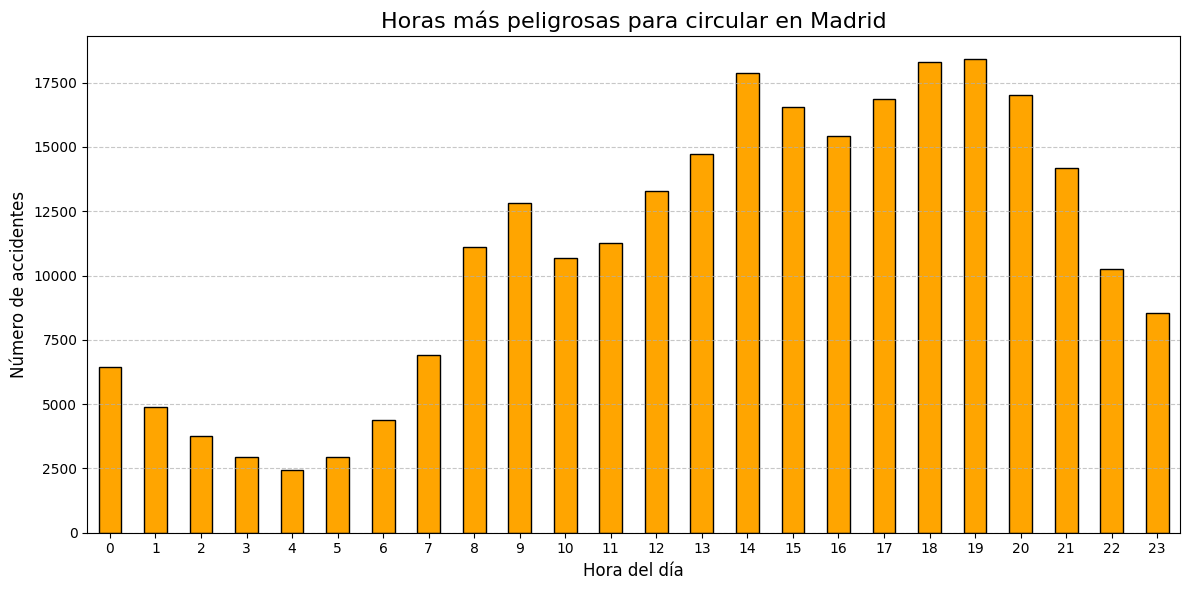

In [119]:
# Ordenar las horas de manera numérica
accidentes_por_hora = df_unico['hora'].value_counts().sort_index()

# Graficar accidentes por hora con formato mejorado
plt.figure(figsize=(12, 6))
accidentes_por_hora.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Horas más peligrosas para circular en Madrid', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Los peak de accidentes son entre las 08:00 a 09:00 horas y 14:00 a 19:00 horas: El primero se relaciona con la hora matutina de traslados a trabajos y colegios y el segundo en el regreso a casa, alcanzando su punto máximo alrededor de las 19:00 horas.*

*Las menos peligrosas fluctuan entre las 02:00 y las 05:00 hrs debido al descenso del tráfico vehicular.*

*Los días laborales tienen picos pronunciados en las horas punta, mientras que los fines de semana presentan una distribución más uniforme, con menor actividad general.*

*Los días laborales tienen muchos más accidentes en total, lo que refleja un mayor volumen de tráfico en esas jornadas.*

##**OTROS ANALISIS**

## Número de accidentes por año

Número de accidentes por año:
año
2019.0    20479
2020.0    12754
2021.0    16515
2022.0    18440
2023.0    19161
2024.0    16487
Name: count, dtype: int64


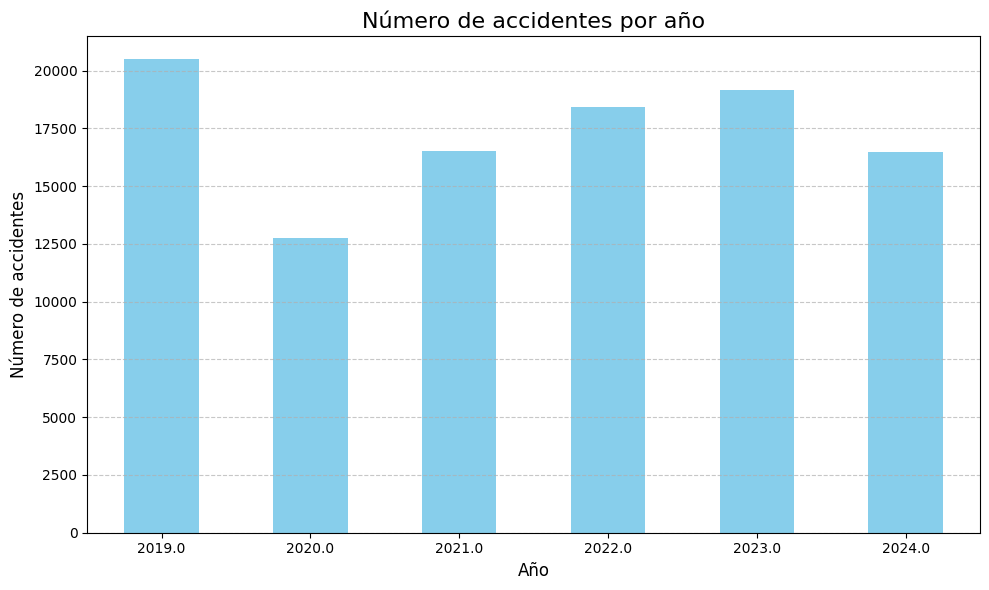

In [120]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
df_unico['fecha'] = pd.to_datetime(df_unico['fecha'], errors='coerce')

# Extraer el año de la columna 'fecha'
df_unico['año'] = df_unico['fecha'].dt.year

# Contar el número de accidentes por año
accidentes_por_año = df_unico['año'].value_counts().sort_index()

# Mostrar los resultados
print("Número de accidentes por año:")
print(accidentes_por_año)

# Visualización del número de accidentes por año
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
accidentes_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de accidentes por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Año con mayor número de accidentes:**

*El año 2019 registra el mayor número de accidentes, superando los 50,000 casos. Esto podría estar relacionado con una actividad normal previa a la pandemia de COVID-19.*

**Disminución en 2020:**

*Se observa una caída significativa en 2020, posiblemente debido a las restricciones de movilidad y confinamientos derivados de la pandemia, que redujeron drásticamente el tráfico.*

## **Cantidad de fallecidos por año**


In [121]:
# Ver los valores únicos en la columna 'lesividad'
valores_lesividad = df_unico['lesividad'].unique()
print("Valores únicos en la columna 'lesividad':")
print(valores_lesividad)


Valores únicos en la columna 'lesividad':
['Asistencia sanitaria sólo en el lugar del accidente'
 'Sin asistencia sanitaria' 'Ingreso inferior o igual a 24 horas'
 'Asistencia sanitaria ambulatoria con posterioridad'
 'Ingreso superior a 24 horas'
 'Atención en urgencias sin posterior ingreso'
 'Asistencia sanitaria inmediata en centro de salud o mutua'
 'Fallecido 24 horas' 'Se desconoce']


Cantidad de fallecidos por año:
año
2019.0    17
2020.0    12
2021.0    11
2022.0    10
2023.0     7
2024.0    11
Name: count, dtype: int64


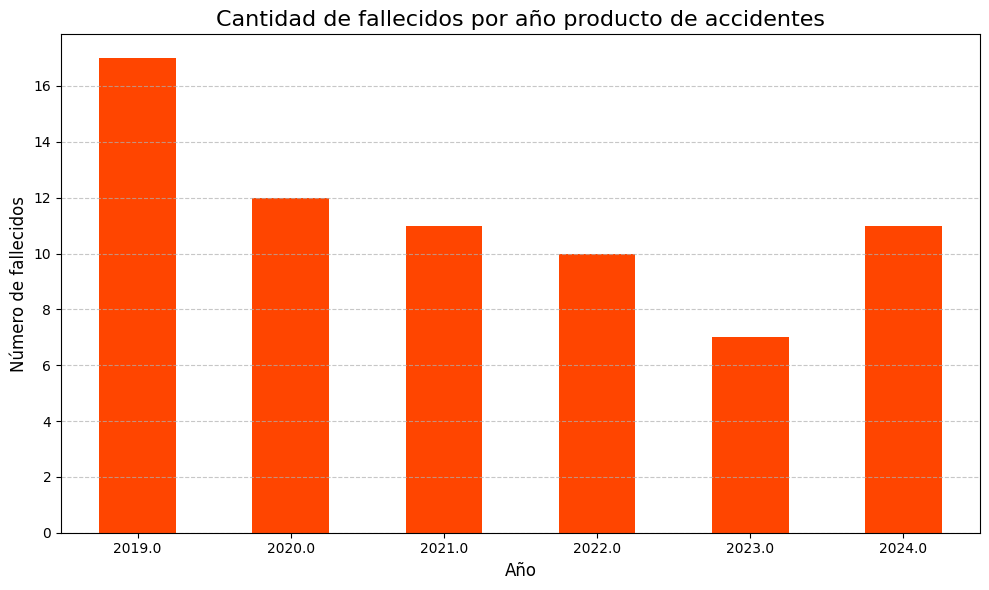

In [122]:
# Filtrar registros donde 'lesividad' es 'Fallecido 24 horas'
fallecidos = df_unico[df_unico['lesividad'] == 'Fallecido 24 horas']

# Contar el número de fallecidos por año
fallecidos_por_año = fallecidos['año'].value_counts().sort_index()

# Mostrar los resultados
print("Cantidad de fallecidos por año:")
print(fallecidos_por_año)

# Visualización del número de fallecidos por año
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
fallecidos_por_año.plot(kind='bar', color='orangered')
plt.title('Cantidad de fallecidos por año producto de accidentes', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de fallecidos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Causas de fallecimientos (tipos de accidentes)

Causas de fallecimientos según tipo de accidente:
tipo_accidente
Otro accidente                  103
Colisión fronto-lateral          26
Choque contra obstáculo fijo     24
Alcance                          10
Colisión lateral                  5
Name: count, dtype: int64


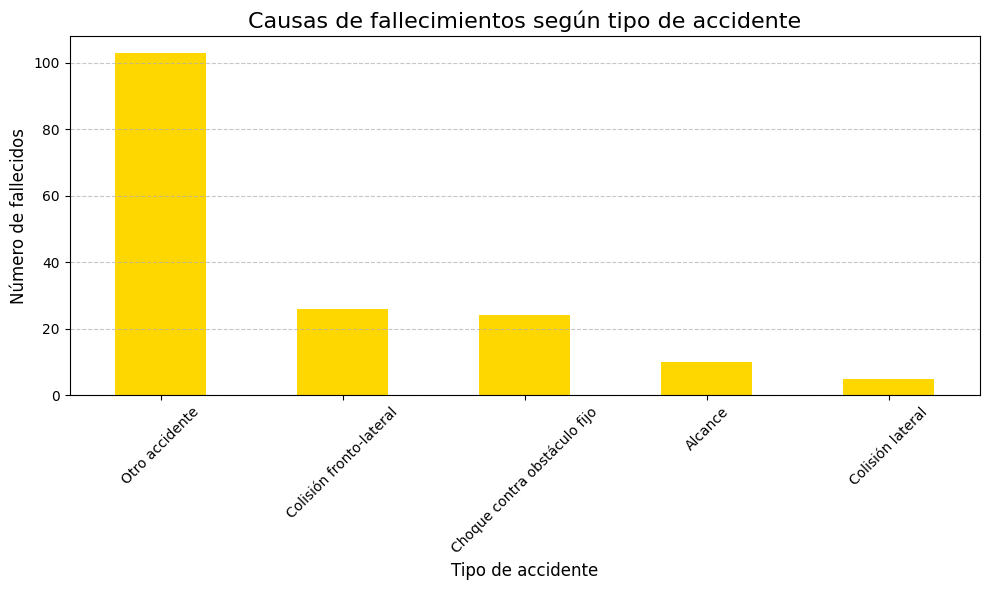

In [123]:
# Contar los tipos de accidentes entre los fallecidos
tipos_accidente_fallecidos = fallecidos['tipo_accidente'].value_counts()

# Mostrar los resultados
print("Causas de fallecimientos según tipo de accidente:")
print(tipos_accidente_fallecidos)

# Graficar las causas
plt.figure(figsize=(10, 6))
tipos_accidente_fallecidos.plot(kind='bar', color='gold')
plt.title('Causas de fallecimientos según tipo de accidente', fontsize=16)
plt.xlabel('Tipo de accidente', fontsize=12)
plt.ylabel('Número de fallecidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Distribución horaria de fallecidos


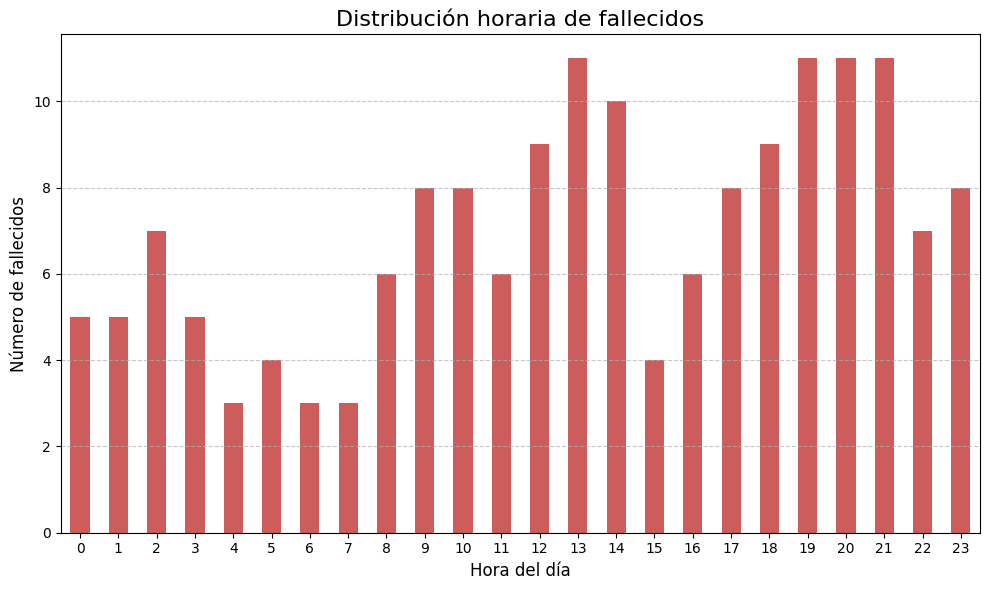

In [124]:
# Contar los fallecidos por hora
fallecidos_por_hora = fallecidos['hora'].value_counts().sort_index()

# Graficar la distribución horaria
plt.figure(figsize=(10, 6))
fallecidos_por_hora.plot(kind='bar', color='indianred')
plt.title('Distribución horaria de fallecidos', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de fallecidos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*La distribución de fallecimientos está influenciada por el volumen de tráfico y las condiciones típicas de cada hora del día (luz, tráfico, actividades sociales, etc.).*

### Relación con el tipo de vehículo: Verificamos si ciertos tipos de vehículos están más asociados con accidentes fatales.

Tipos de vehículos asociados a fallecimientos:
tipo_vehiculo
Motocicleta      71
Turismo          66
Otro vehículo    12
Autobús           7
Bicicleta         7
Camión            5
Name: count, dtype: int64


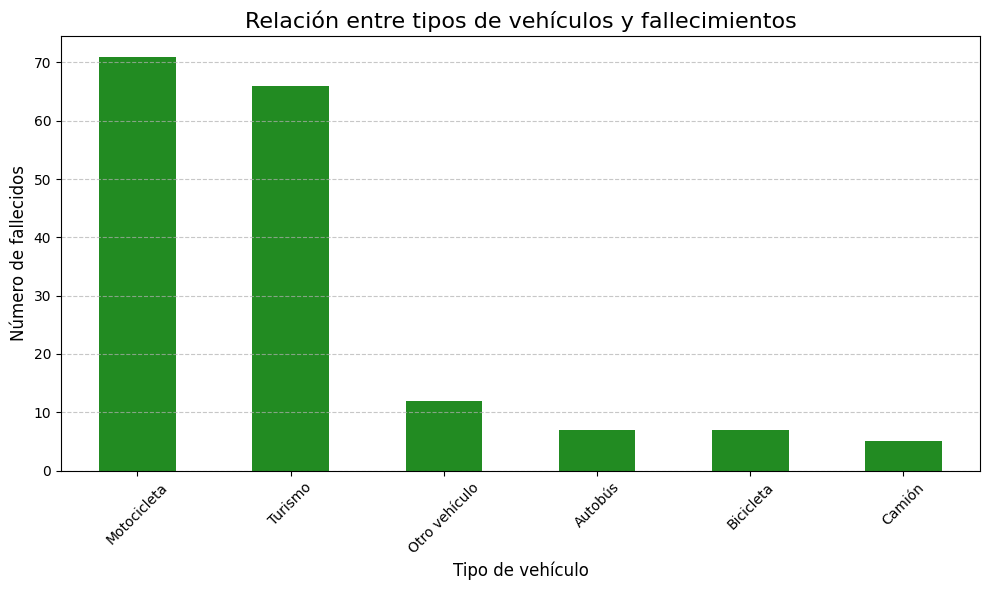

In [125]:
# Contar los tipos de vehículos entre los fallecidos
tipos_vehiculo_fallecidos = fallecidos['tipo_vehiculo'].value_counts()

# Mostrar los resultados
print("Tipos de vehículos asociados a fallecimientos:")
print(tipos_vehiculo_fallecidos)

# Graficar la relación con el tipo de vehículo
plt.figure(figsize=(10, 6))
tipos_vehiculo_fallecidos.plot(kind='bar', color='forestgreen')
plt.title('Relación entre tipos de vehículos y fallecimientos', fontsize=16)
plt.xlabel('Tipo de vehículo', fontsize=12)
plt.ylabel('Número de fallecidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Número de accidentes por distrito

Número de accidentes por distrito:
distrito
PUENTE DE VALLECAS     20790
SALAMANCA              18922
CHAMARTÍN              18293
CARABANCHEL            17186
CIUDAD LINEAL          17123
CENTRO                 14157
FUENCARRAL-EL PARDO    13747
MONCLOA-ARAVACA        13744
SAN BLAS-CANILLEJAS    13453
RETIRO                 13265
LATINA                 12576
CHAMBERÍ               12444
ARGANZUELA             12143
TETUÁN                 11500
USERA                  10642
HORTALEZA              10173
VILLAVERDE              8499
MORATALAZ               7345
VILLA DE VALLECAS       7026
BARAJAS                 4748
VICÁLVARO               4281
Name: count, dtype: int64


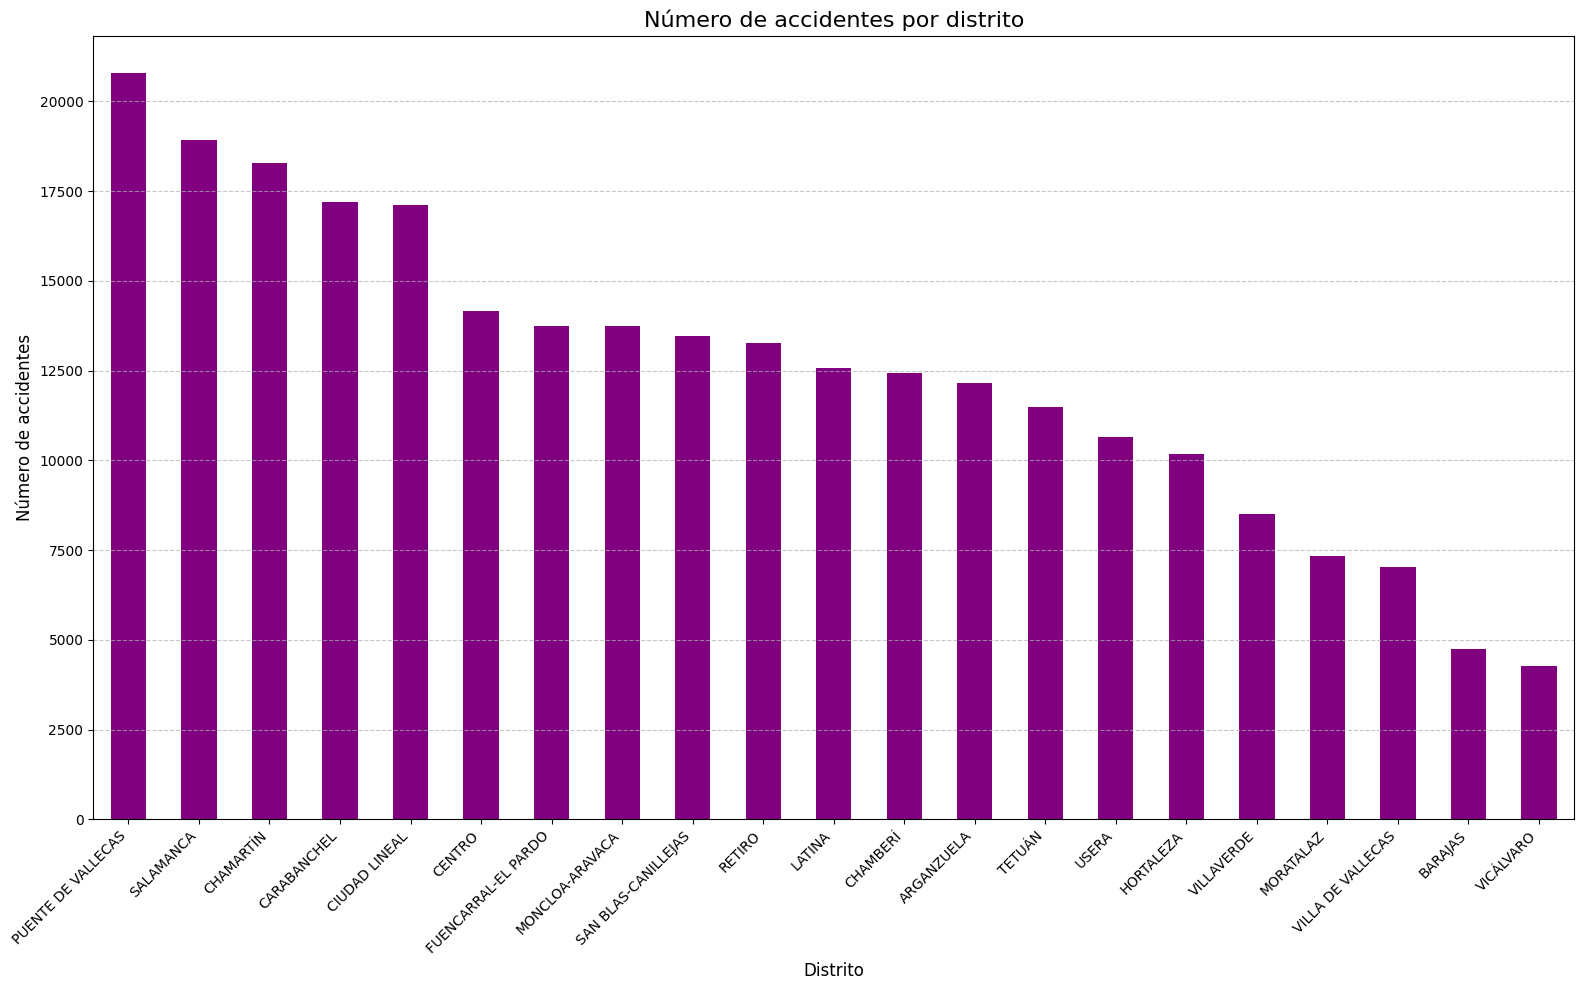

In [126]:
# Contar el número de accidentes por distrito
accidentes_por_distrito = df_unico['distrito'].value_counts()

# Mostrar los resultados
print("Número de accidentes por distrito:")
print(accidentes_por_distrito)

plt.figure(figsize=(16, 10))
accidentes_por_distrito.plot(kind='bar', color='purple')
plt.title('Número de accidentes por distrito', fontsize=16)
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
